In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load Dataset
data = pd.read_excel('../stage_report/Sutton_Borough_Data.xlsx')

In [124]:
data.head()

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpHoursRoundUp,Notional Cost (£),NumCalls
0,000382-01012019,01 Jan 2019,2019,07:54:10,7,Fire,Primary Fire,NaN,Non Residential,Private Garden Shed,...,893.0,Sutton,NaN,NaN,1.0,1.0,1.0,1.0,333.0,1
1,000553-01012019,01 Jan 2019,2019,16:49:19,16,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,...,437.0,Wallington,NaN,NaN,2.0,2.0,2.0,2.0,666.0,1
2,000577-01012019,01 Jan 2019,2019,18:16:05,18,Special Service,Special Service,Assist other agencies,Dwelling,House - single occupancy,...,382.0,Wallington,424.0,Croydon,2.0,2.0,2.0,4.0,1332.0,1
3,000624-01012019,01 Jan 2019,2019,21:08:28,21,Fire,Primary Fire,NaN,Outdoor Structure,Other outdoor equipment/machinery,...,364.0,Sutton,691.0,Surbiton,2.0,2.0,2.0,3.0,999.0,1
4,000730-02012019,02 Jan 2019,2019,06:10:00,6,False Alarm,AFA,NaN,Dwelling,Self contained Sheltered Housing,...,283.0,Sutton,620.0,Wallington,2.0,2.0,2.0,1.0,333.0,1


In [125]:
relevant_columns = [
    'PropertyCategory', 'PropertyType', 'IncidentGroup', 'StopCodeDescription',
    'DateOfCall', 'TimeOfCall', 'HourOfCall', 'Postcode_district',
    'Latitude', 'Longitude', 'NumPumpsAttending', 'PumpCount',
    'Notional Cost (£)'
]

data_subset = data[relevant_columns]

data_subset.head()

,PropertyCategory,PropertyType,IncidentGroup,StopCodeDescription,DateOfCall,TimeOfCall,HourOfCall,Postcode_district,Latitude,Longitude,NumPumpsAttending,PumpCount,Notional Cost (£)
0,Non Residential,Private Garden Shed,Fire,Primary Fire,01 Jan 2019,07:54:10,7,SM1,NaN,NaN,1.0,1.0,333.0
1,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,False Alarm,AFA,01 Jan 2019,16:49:19,16,SM1,NaN,NaN,2.0,2.0,666.0
2,Dwelling,House - single occupancy,Special Service,Special Service,01 Jan 2019,18:16:05,18,SM6,NaN,NaN,2.0,2.0,1332.0
3,Outdoor Structure,Other outdoor equipment/machinery,Fire,Primary Fire,01 Jan 2019,21:08:28,21,KT4,51.381459,-0.227416,2.0,2.0,999.0
4,Dwelling,Self contained Sheltered Housing,False Alarm,AFA,02 Jan 2019,06:10:00,6,SM1,NaN,NaN,2.0,2.0,333.0


In [126]:
data_subset.isnull().sum()

PropertyCategory          0
PropertyType              0
IncidentGroup             0
StopCodeDescription       0
DateOfCall                0
TimeOfCall                0
HourOfCall                0
Postcode_district         0
Latitude               3777
Longitude              3777
NumPumpsAttending       100
PumpCount                42
Notional Cost (£)        42
dtype: int64

In [127]:
# Dropping Latitude and Longitude columns
data_subset = data_subset.drop(columns=['Latitude', 'Longitude'])

# Imputing missing values for NumPumpsAttending, PumpCount, and Notional Cost (£)
mean_pumps_attending = data_subset['NumPumpsAttending'].mean()
mean_pump_count = data_subset['PumpCount'].mean()
mean_notional_cost = data_subset['Notional Cost (£)'].mean()

data_subset['NumPumpsAttending'].fillna(mean_pumps_attending, inplace=True)
data_subset['PumpCount'].fillna(mean_pump_count, inplace=True)
data_subset['Notional Cost (£)'].fillna(mean_notional_cost, inplace=True)

# Check the missing values again
print(data_subset.isnull().sum())


PropertyCategory       0
PropertyType           0
IncidentGroup          0
StopCodeDescription    0
DateOfCall             0
TimeOfCall             0
HourOfCall             0
Postcode_district      0
NumPumpsAttending      0
PumpCount              0
Notional Cost (£)      0
dtype: int64


In [128]:
# Convert DateOfCall and TimeOfCall
data_subset['DateTimeOfCall'] = pd.to_datetime(data_subset['DateOfCall'] + ' ' + data_subset['TimeOfCall'])

# Drop the original DateOfCall and TimeOfCall columns as they are now redundant
data_subset = data_subset.drop(columns=['DateOfCall', 'TimeOfCall'])

print(data_subset.dtypes)
data_subset.head()


PropertyCategory               object
PropertyType                   object
IncidentGroup                  object
StopCodeDescription            object
HourOfCall                      int64
Postcode_district              object
NumPumpsAttending             float64
PumpCount                     float64
Notional Cost (£)             float64
DateTimeOfCall         datetime64[ns]
dtype: object


,PropertyCategory,PropertyType,IncidentGroup,StopCodeDescription,HourOfCall,Postcode_district,NumPumpsAttending,PumpCount,Notional Cost (£),DateTimeOfCall
0,Non Residential,Private Garden Shed,Fire,Primary Fire,7,SM1,1.0,1.0,333.0,2019-01-01 07:54:10
1,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,False Alarm,AFA,16,SM1,2.0,2.0,666.0,2019-01-01 16:49:19
2,Dwelling,House - single occupancy,Special Service,Special Service,18,SM6,2.0,2.0,1332.0,2019-01-01 18:16:05
3,Outdoor Structure,Other outdoor equipment/machinery,Fire,Primary Fire,21,KT4,2.0,2.0,999.0,2019-01-01 21:08:28
4,Dwelling,Self contained Sheltered Housing,False Alarm,AFA,6,SM1,2.0,2.0,333.0,2019-01-02 06:10:00


In [129]:
print(data_subset.dtypes)
data_subset.head()

PropertyCategory               object
PropertyType                   object
IncidentGroup                  object
StopCodeDescription            object
HourOfCall                      int64
Postcode_district              object
NumPumpsAttending             float64
PumpCount                     float64
Notional Cost (£)             float64
DateTimeOfCall         datetime64[ns]
dtype: object


,PropertyCategory,PropertyType,IncidentGroup,StopCodeDescription,HourOfCall,Postcode_district,NumPumpsAttending,PumpCount,Notional Cost (£),DateTimeOfCall
0,Non Residential,Private Garden Shed,Fire,Primary Fire,7,SM1,1.0,1.0,333.0,2019-01-01 07:54:10
1,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,False Alarm,AFA,16,SM1,2.0,2.0,666.0,2019-01-01 16:49:19
2,Dwelling,House - single occupancy,Special Service,Special Service,18,SM6,2.0,2.0,1332.0,2019-01-01 18:16:05
3,Outdoor Structure,Other outdoor equipment/machinery,Fire,Primary Fire,21,KT4,2.0,2.0,999.0,2019-01-01 21:08:28
4,Dwelling,Self contained Sheltered Housing,False Alarm,AFA,6,SM1,2.0,2.0,333.0,2019-01-02 06:10:00


In [130]:
import numpy as np

# Extracting day of the week and month from DateTimeOfCall
data_subset['DayOfWeek'] = data_subset['DateTimeOfCall'].dt.day_name()
data_subset['Month'] = data_subset['DateTimeOfCall'].dt.month_name()

# Categorize time of day
def part_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

# Applying the function to HourOfCall
data_subset['PartOfDay'] = data_subset['HourOfCall'].apply(part_of_day)

# Checking
print(data_subset[['DateTimeOfCall', 'DayOfWeek', 'Month', 'PartOfDay']].head())


       DateTimeOfCall  DayOfWeek    Month  PartOfDay
0 2019-01-01 07:54:10    Tuesday  January    Morning
1 2019-01-01 16:49:19    Tuesday  January  Afternoon
2 2019-01-01 18:16:05    Tuesday  January    Evening
3 2019-01-01 21:08:28    Tuesday  January    Evening
4 2019-01-02 06:10:00  Wednesday  January    Morning


In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Summary of Numerical Features
print(data_subset.describe())



        HourOfCall  NumPumpsAttending    PumpCount  Notional Cost (£)  \
count  7301.000000        7301.000000  7301.000000        7301.000000   
mean     13.563895           1.495903     1.557515         503.570326   
min       0.000000           1.000000     1.000000         333.000000   
25%      10.000000           1.000000     1.000000         346.000000   
50%      14.000000           1.000000     1.000000         352.000000   
75%      18.000000           2.000000     2.000000         364.000000   
max      23.000000           6.000000   142.000000      240690.000000   
std       6.079873           0.743753     1.893635        2885.569374   

                      DateTimeOfCall  
count                           7301  
mean   2021-02-02 14:10:12.444459520  
min              2019-01-01 07:54:10  
25%              2020-01-24 15:48:57  
50%              2021-03-16 09:10:55  
75%              2022-02-17 19:32:06  
max              2022-11-30 21:42:00  
std                           

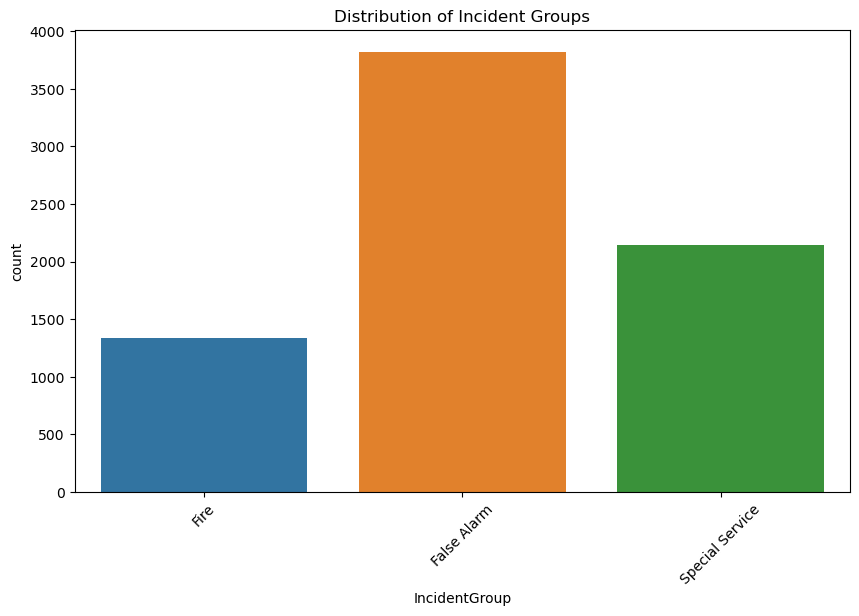

In [132]:
# Distribution of Incident Groups
plt.figure(figsize=(10, 6))
sns.countplot(data=data_subset, x='IncidentGroup')
plt.title('Distribution of Incident Groups')
plt.xticks(rotation=45)
plt.show()



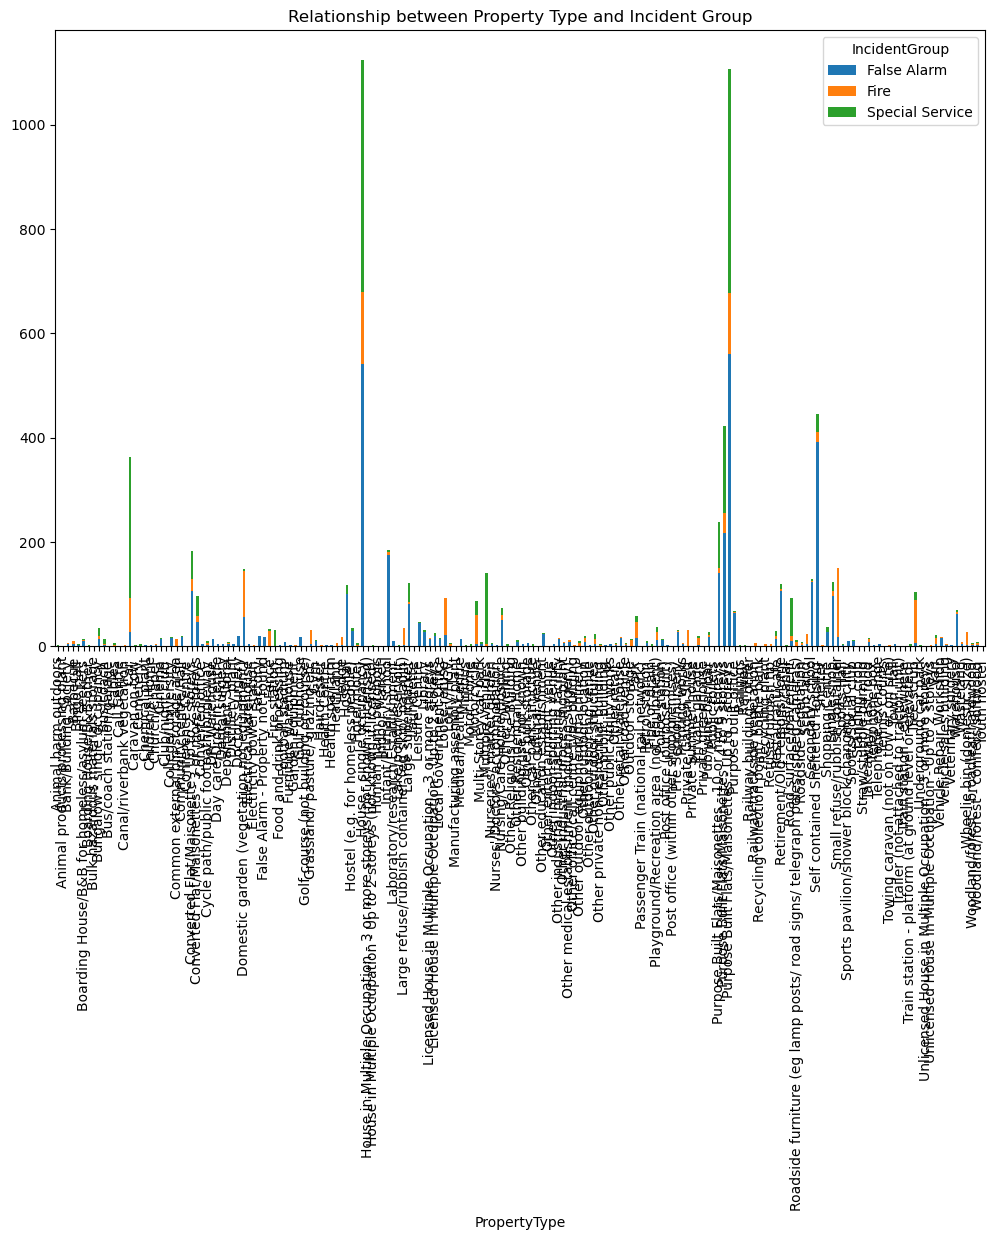

In [133]:
# Relationship between Property Type and Incident Group
ct = pd.crosstab(data_subset['PropertyType'], data_subset['IncidentGroup'])
ct.plot(kind='bar', figsize=(12, 8), stacked=True)
plt.title('Relationship between Property Type and Incident Group')
plt.xticks(rotation=90)
plt.show()



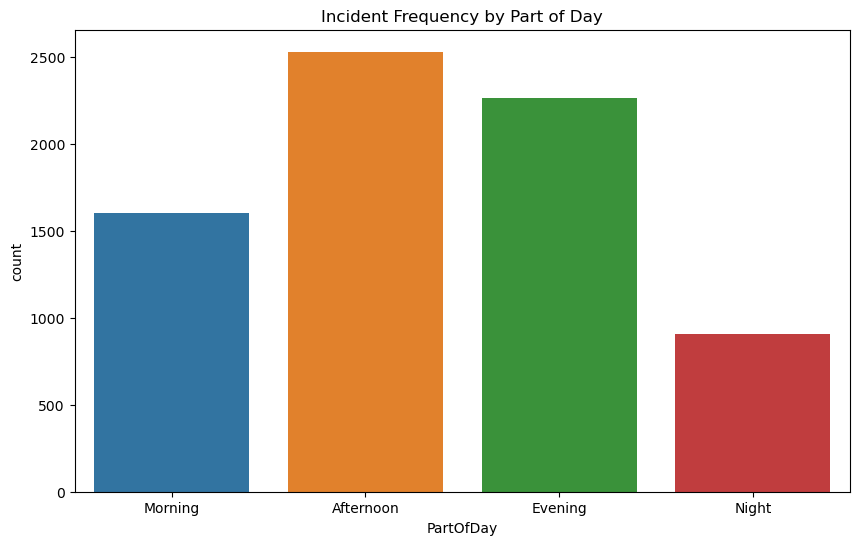

In [134]:
# Incident Frequency by Part of Day
plt.figure(figsize=(10, 6))
sns.countplot(data=data_subset, x='PartOfDay', order=['Morning', 'Afternoon', 'Evening', 'Night'])
plt.title('Incident Frequency by Part of Day')
plt.show()


In [135]:
from sklearn.preprocessing import StandardScaler

features_to_scale = ['HourOfCall', 'NumPumpsAttending', 'PumpCount', 'Notional Cost (£)']

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the features
data_subset[features_to_scale] = scaler.fit_transform(data_subset[features_to_scale])

# Check the transformed data
print(data_subset[features_to_scale].head())


   HourOfCall  NumPumpsAttending  PumpCount  Notional Cost (£)
0   -1.079685          -0.666804  -0.294435          -0.059116
1    0.400711           0.677821   0.233686           0.056294
2    0.729688           0.677821   0.233686           0.287114
3    1.223153           0.677821   0.233686           0.171704
4   -1.244173           0.677821   0.233686          -0.059116


In [136]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X = data_subset.drop(['IncidentGroup'], axis=1)  # IncidentGroup is what to  use to predict
y = data_subset['IncidentGroup']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

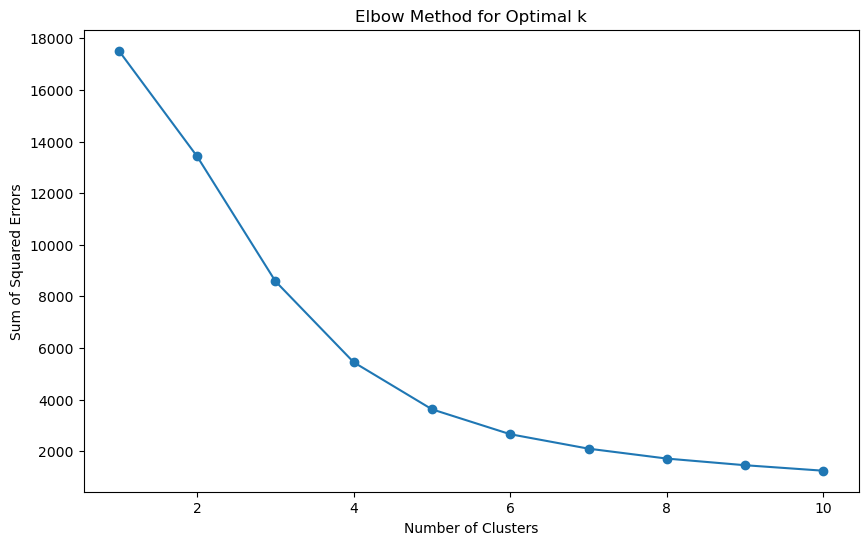

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [137]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# selected the relevant features for clustering
features_for_clustering = X_train[['HourOfCall', 'NumPumpsAttending', 'PumpCount']] 
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_for_clustering)

# Finding the optimal number of clusters using the Elbow Method
sse = []
for k in range(1, 11):  # test different numbers of clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors')
plt.show()

kmeans_optimal = KMeans(n_clusters=3, random_state=42)
kmeans_optimal.fit(features_scaled)

# Analyzing the resulting clusters
cluster_labels = kmeans_optimal.labels_
X_train['Cluster'] = cluster_labels  # Adding cluster information to the training data for analysis


In [138]:
X_train['Cluster'] = cluster_labels

# Merging the cluster labels with additional relevant data from the original dataset for comprehensive analysis
analysis_df = X_train.join(y_train)  #  y_train = IncidentGroup

# Group the data by cluster and examine statistics and distributions for each cluster
for i in range(4):  #  4 was identified as optimal number of clusters
    cluster_data = analysis_df[analysis_df['Cluster'] == i]
    print(f"Analysis for Cluster {i}:")
    print(cluster_data.describe())  # Summary statistics
    print(cluster_data['IncidentGroup'].value_counts())  # Frequency of incident types in each cluster


Analysis for Cluster 0:
        HourOfCall  NumPumpsAttending    PumpCount  Notional Cost (£)  \
count  3533.000000        3533.000000  3533.000000        3533.000000   
mean      0.008928          -0.652271    -0.281770          -0.037437   
min      -2.231103          -0.666804    -0.294435          -0.059116   
25%      -0.586219          -0.666804    -0.294435          -0.057036   
50%       0.071734          -0.666804    -0.294435          -0.052531   
75%       0.729688          -0.666804    -0.294435          -0.048372   
max       1.552130           0.000000     1.818049           1.843932   
std       0.972465           0.097375     0.097058           0.080957   

                      DateTimeOfCall  Cluster  
count                           3533   3533.0  
mean   2021-02-27 05:31:32.846589440      0.0  
min              2019-01-02 09:34:50      0.0  
25%              2020-02-17 23:48:22      0.0  
50%              2021-05-01 01:20:31      0.0  
75%              2022-03-15 15

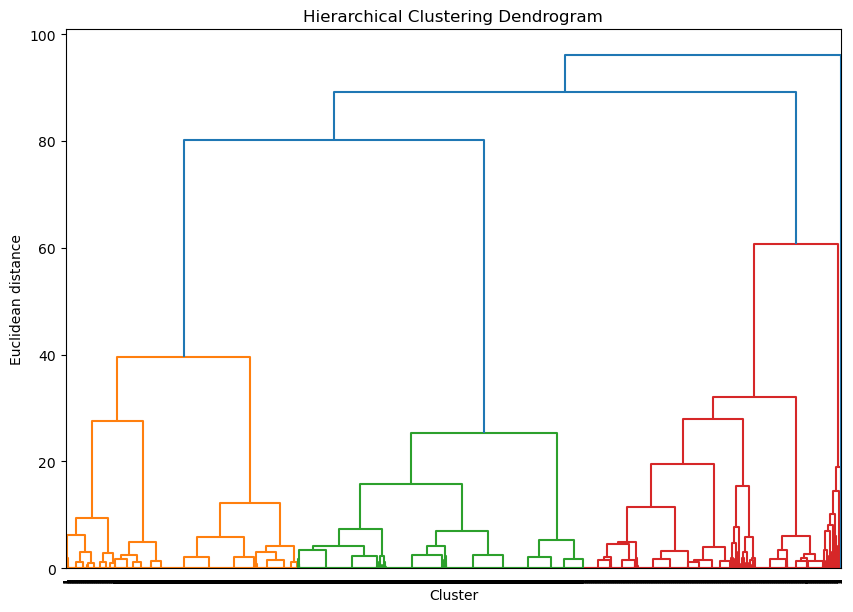

In [139]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Perform hierarchical clustering
linked = linkage(features_scaled, 'ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           labels=cluster_labels.astype(str),
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster')
plt.ylabel('Euclidean distance')
plt.show()


In [140]:
# Encoding categorical columns
data_subset = pd.get_dummies(data_subset, columns=['StopCodeDescription', 'Postcode_district', 'PropertyCategory', 'PropertyType', 'DayOfWeek', 'Month', 'PartOfDay'], drop_first=True)


In [141]:
# Drop the DateTimeOfCall column
data_subset = data_subset.drop(['DateTimeOfCall'], axis=1)

# model preparation and training
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X = data_subset.drop('IncidentGroup', axis=1)  
y = data_subset['IncidentGroup']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


                 precision    recall  f1-score   support

    False Alarm       1.00      1.00      1.00       754
           Fire       1.00      1.00      1.00       280
Special Service       1.00      1.00      1.00       427

       accuracy                           1.00      1461
      macro avg       1.00      1.00      1.00      1461
   weighted avg       1.00      1.00      1.00      1461



In [142]:
from sklearn.model_selection import cross_val_score

log_reg = LogisticRegression(max_iter=1000)
scores = cross_val_score(log_reg, X, y, cv=5)  # 5-fold cross-validation

print("Accuracy scores for each fold:")
print(scores)
print("Average cross-validation score: {:.2f}".format(scores.mean()))


Accuracy scores for each fold:
[1.         0.99931507 0.96849315 1.         0.99931507]
Average cross-validation score: 0.99


In [143]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Classification Report:
                 precision    recall  f1-score   support

    False Alarm       1.00      1.00      1.00       754
           Fire       1.00      1.00      1.00       280
Special Service       1.00      1.00      1.00       427

       accuracy                           1.00      1461
      macro avg       1.00      1.00      1.00      1461
   weighted avg       1.00      1.00      1.00      1461



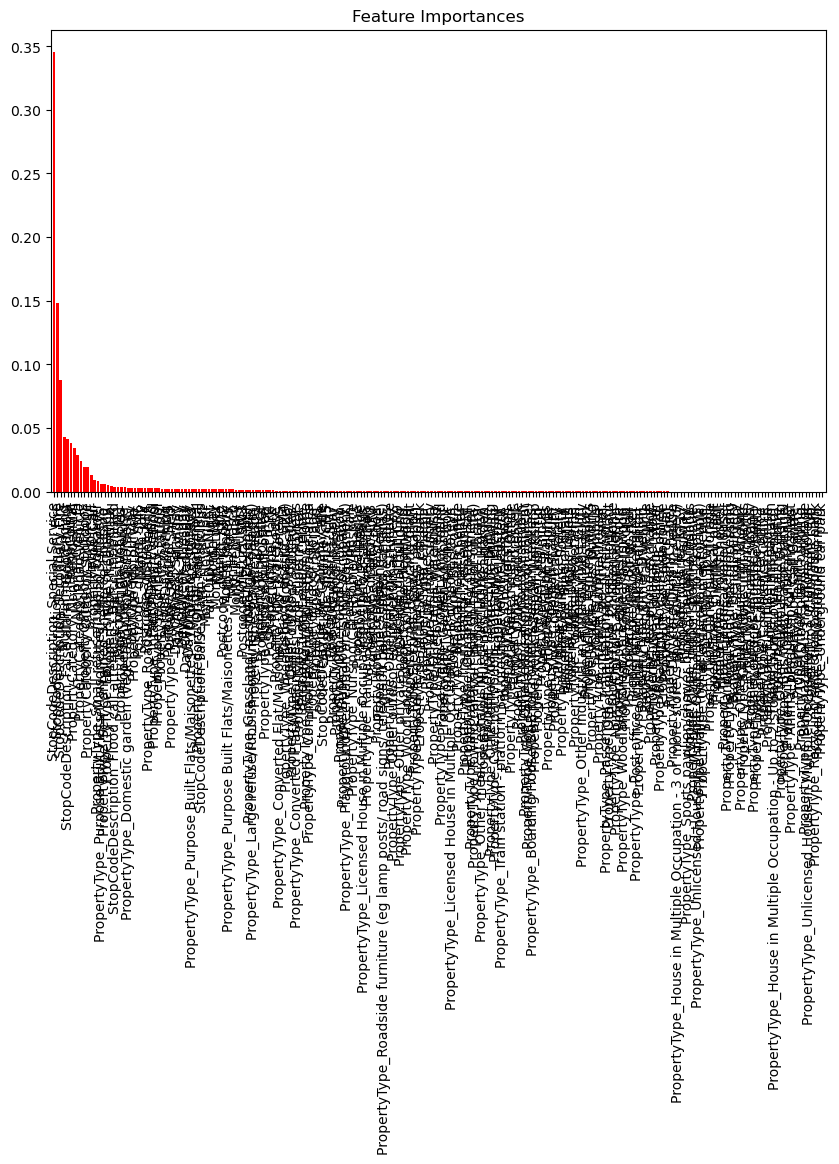

In [144]:
import matplotlib.pyplot as plt

# Get feature importances from the model
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1] 

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()
